<a href="https://colab.research.google.com/github/ganeshsai111/Data-Science-Projects/blob/main/graduate_admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project we deal with problem of predicting admission chances in universities.Based on thr historical data of students admitted into university,the chances of current students will be predicted.Machine learning algorithms will be used for solving this problem.we follow several steps in tackling the problem.They are

1.Understanding historical data

2.Exploratory data analysis

3.Model Building

4.Model Evaluation

**Understanding historical data**

Reading the data

Dataset is available as CSV file.Dataset can be loaded by using read_csv in pandas library

In [ ]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/Admission_Predict.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df.shape

(400, 9)

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**Chance of admit** is the target variable

Except **serial number** first 7 columns are responsible for prediction

In [ ]:

df.rename(columns={'Chance of Admit ':'xyz'},inplace=True)


In [ ]:
df.rename(columns={'SOP':'abc'},inplace=True)

**Variable Identification**

 describe function gives the statistical measures of the variables

In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,abc,LOR,CGPA,Research,xyz
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


If we see here GRE Score its mean is 316 and maximum is 340 .so most of the students are getting the average values near to the maximum so it is skewed to the Maximum Which is Right Skewed.

25%,50% and 75% are the quartiles of the data

on Obseving there are 400 entries are available in the dataset

In [ ]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
abc                  float64
LOR                  float64
CGPA                 float64
Research               int64
xyz                  float64
dtype: object

All are numerical values there are no categorical or text variables

**Exploratory Data Analysis**

Missing Values

In [ ]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
abc                  0
LOR                  0
CGPA                 0
Research             0
xyz                  0
dtype: int64

isnull function checks for the null values in the dataset

sum function gives the total number of missing values in a column

There are no missing values in the dataset

**Identifying and Removing Outliers**

<Axes: >

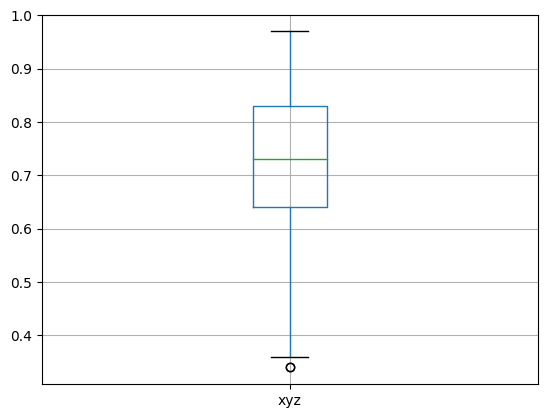

In [ ]:
df.boxplot(column=['xyz'])

<Axes: >

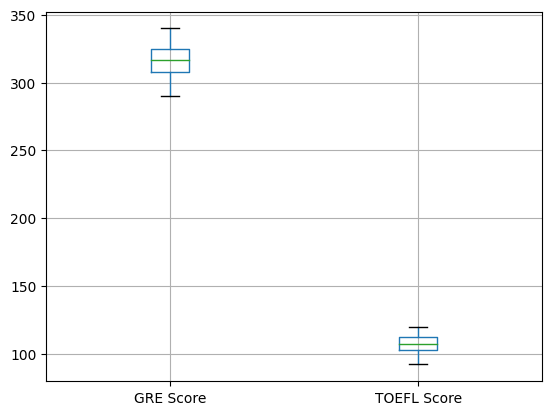

In [ ]:
df.boxplot(column = ['GRE Score','TOEFL Score'])

<Axes: >

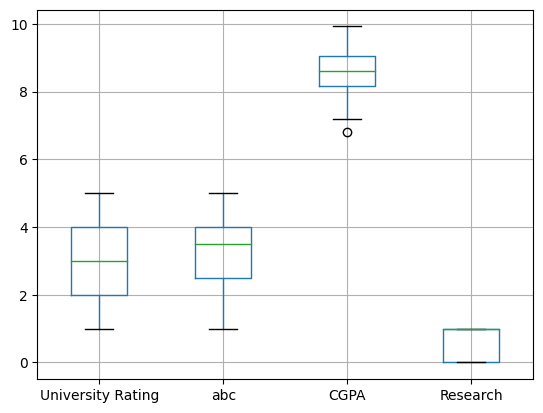

In [ ]:
df.boxplot(column = ['University Rating','abc','CGPA','Research'])

In [ ]:
df1=df.copy()
df1.drop(['Serial No.'],axis=1,inplace=True)

In [ ]:
q1=df1.quantile(0.25)
q3=df1.quantile(0.75)
iqr=q3-q1
print(iqr)

GRE Score            17.0000
TOEFL Score           9.0000
University Rating     2.0000
abc                   1.5000
LOR                   1.0000
CGPA                  0.8925
Research              1.0000
xyz                   0.1900
dtype: float64


In [ ]:
df_out1=df1[((df1 < (q1-1.5*iqr)) | (df1 > (q3+1.5*iqr))).any(axis=1)]
df_out1

,GRE Score,TOEFL Score,University Rating,abc,LOR,CGPA,Research,xyz
58,300,99,1,3.0,2.0,6.80,1,0.36
92,298,98,2,4.0,3.0,8.03,0,0.34
347,299,94,1,1.0,1.0,7.34,0,0.42
376,297,96,2,2.5,2.0,7.43,0,0.34


There are 4 Outliers

In [ ]:
#removing outliers
df_out=df1[~((df1 < (q1-1.5*iqr))| (df1 > (q3+1.5*iqr))).any(axis=1)]
df=df_out.copy()
print(df.shape)

(396, 8)


**Univariate Analysis**

Text(0.5, 0, 'Admit')

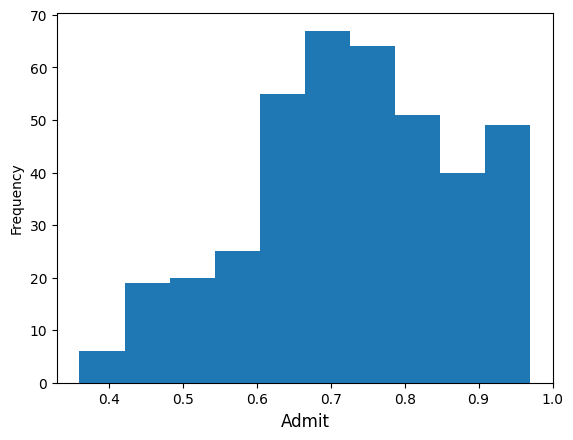

In [ ]:
df['xyz'].plot.hist()
plt.xlabel('Admit',fontsize=12)

Text(0.5, 0, 'Ratings')

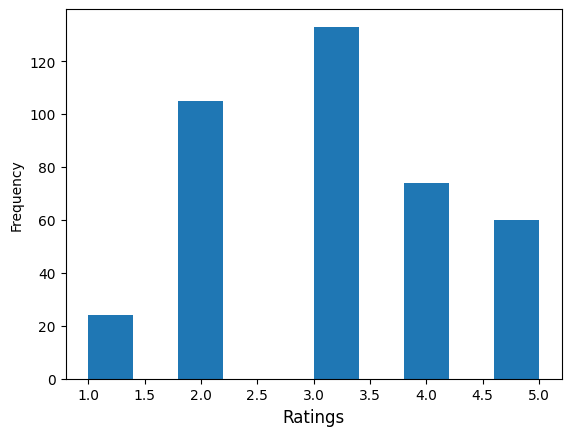

In [ ]:
df['University Rating'].plot.hist()
plt.xlabel('Ratings',fontsize=12)

Less number of students getting low grades

maximum studenrs getting between 3 to 3.5 rating

In [ ]:
df['Research'].value_counts()

1    218
0    178
Name: Research, dtype: int64

218 students have the research experience 178 students haven't

**Bivariate Analysis**

<Axes: xlabel='GRE Score', ylabel='xyz'>

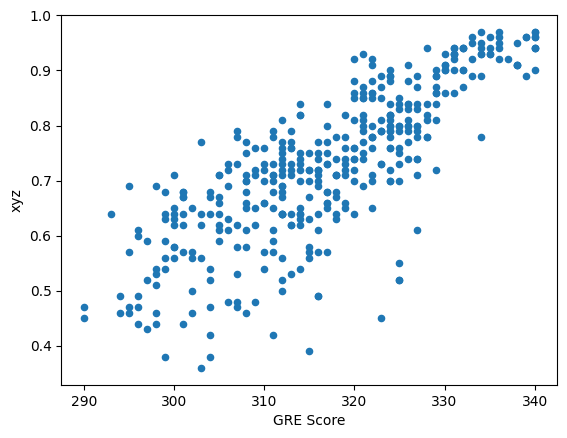

In [ ]:
df.plot.scatter('GRE Score','xyz')

In [ ]:
df['GRE Score'].corr(df['xyz'])

0.7981446024321517

<Axes: xlabel='TOEFL Score', ylabel='xyz'>

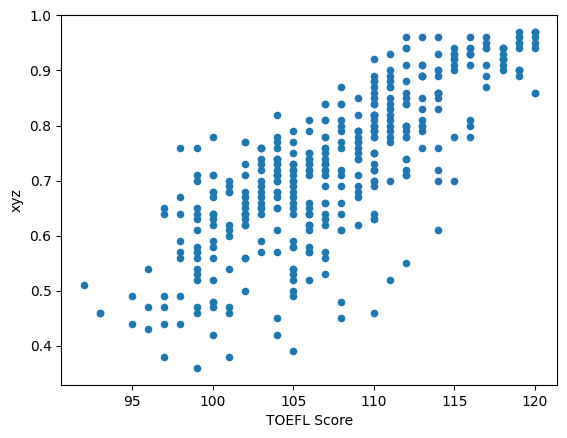

In [ ]:
df.plot.scatter('TOEFL Score','xyz')

In [ ]:
df['TOEFL Score'].corr(df['xyz'])

0.7855190145501377

Compare to the GRE Score and TOFEL Score is less correlation with Chance of Admit(xyz)

TOFEL Score also having positive correlation with Chance of Admit(xyz)

<Axes: xlabel='CGPA', ylabel='xyz'>

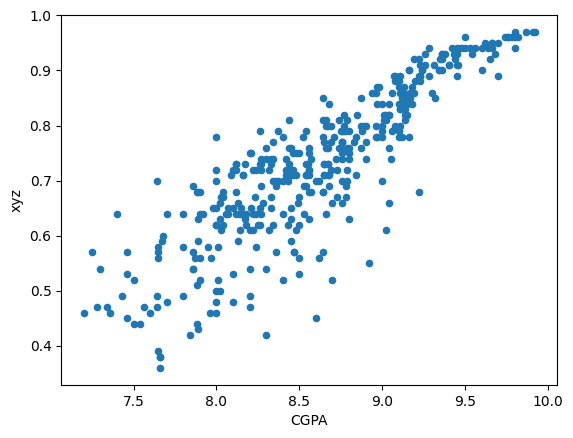

In [ ]:
a=df.plot.scatter('CGPA','xyz')
a

In [ ]:
df['CGPA'].corr(df['xyz'])

0.8709125643678217

Maximum CGPA defines the Chance of Admit(xyz)

<Axes: xlabel='CGPA', ylabel='TOEFL Score'>

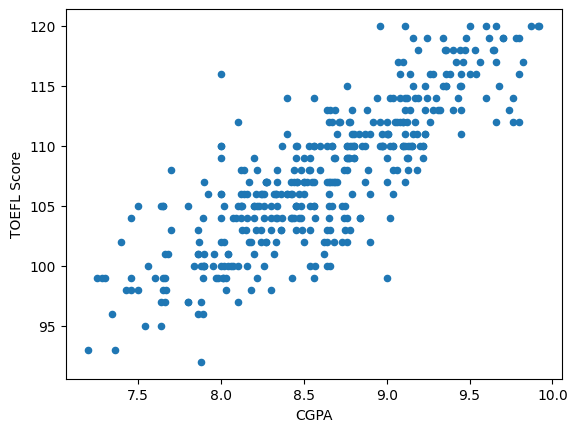

In [ ]:
df.plot.scatter('CGPA','TOEFL Score')

In [ ]:
df['CGPA'].corr(df['TOEFL Score'])

0.8253845537475006

In [ ]:

df['CGPA'].corr(df['GRE Score'])

0.8310846092236094

More CGPA student definitely get a good score in GRE and TOFEL

**Building the Models**

In a model building we use 'sklearn' library . we use sklearn in :

1.Preprocessing data

2.Model selection and Training

3.Predction from model

4.Model evaluation

**Preprocessing Data**

In [ ]:
# separating independent and dependent variables
x=df.drop(['xyz'],axis=1)
y=df['xyz']
x.shape,y.shape

((396, 7), (396,))

**Segregating variables: Independent and dependent variables**

1.x contains all the features except target variable chance of admit(xyz)

2.y is the target variable containing 'chance of admit'(xyz)

In [ ]:
#importing the train and test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

1.train_test_split function separates dataset into training data and test data

2.Data is split randomly using the seed value of random_state

3.By default training data will be 80% of original data and testing data is 20% of dataset

4.random_state can be any integer,and acts as a seed to produce same sampling for every run

**Model selection and training**

In [ ]:
#importing linear regression and metric mean square error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
lr = LinearRegression().fit(train_x,train_y)

**Prediction from the Train Model**

In [ ]:
#predicting over train model
train_predict = lr.predict(train_x)
k=mae(train_predict,train_y)
print('Train Mean Absolute Error in training data',k)

Train Mean Absolute Error in training data 0.042322248248327504


predict method is used to predict the output of the given input

here train_x is the input data

The predicted output is stored in train_predict

mae function give error between actual output and predicted output

In [ ]:
test_predict = lr.predict(test_x)
k=mae(test_predict,test_y)
print('Test Mean Absolute error in training data',k)

Test Mean Absolute error in training data 0.04759567870445303


Here test_x is the input data that is not seen by the model

the predicted output is stored in test_predict

Since Both train and test Errors are very less  it indicates that the model is accurately predicted

**Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
pred_train=lr.predict(train_x)
train_score=np.sqrt(mse(train_y,pred_train))
print(train_score)

0.060088762065116146


In [ ]:
pred_test=lr.predict(test_x)
test_score=np.sqrt(mse(pred_test,test_y))
print(test_score)

0.06872031728014762


In [ ]:
test=lr.score(test_x,test_y)*100
train=lr.score(train_x,train_y)*100
print('Accuracy on train set :' ,train)
print('Accuracy on test set :',test)

Accuracy on train set : 80.4907328822083
Accuracy on test set : 77.60029591127442


**For Training data got 80% Accuracy**

**For testing data got 77% Accuracy**